# NLP - Wstęp do przetwarzania języka naturalnego

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import torch
import torch.nn as nn
from torch.optim import Adam
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(1)

In [3]:
device = torch.device("cuda") 
device

device(type='cuda')

## Bag of words
+ Tworzony jest embedding ze wszystkich słów

In [4]:
from bs4 import BeautifulSoup
import re

In [6]:
reviews = pd.read_csv("https://galera.ii.pw.edu.pl/~kdeja/data/sst2.tsv",delimiter="\t",quoting=3).reset_index(drop=True)

In [9]:
reviews.head(10)

,sentence,label
0,hide new secretions from the parental units,0
1,"contains no wit , only labored gags",0
2,that loves its characters and communicates som...,1
3,remains utterly satisfied to remain the same t...,0
4,on the worst revenge-of-the-nerds clichés the ...,0
5,that 's far too tragic to merit such superfici...,0
6,demonstrates that the director of such hollywo...,1
7,of saucy,1
8,a depressed fifteen-year-old 's suicidal poetry,0
9,are more deeply thought through than in most `...,1


In [10]:
print(reviews["sentence"][4])

on the worst revenge-of-the-nerds clichés the filmmakers could dredge up 


In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\01149762\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Można poprzerabiać opinie różnymi operacjami na słowach - przykladowo usuwajac myslniki pomiedzy:

In [13]:
def review_to_words(raw_review):
    """Function to convert a review to a string of words.
    The input is a single string (a raw movie review), and the output is a single string (a preprocessed movie review)"""
    review_text = BeautifulSoup(raw_review, 'lxml').get_text()
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_words = [word for word in words if not word in stops]
    return " ".join(meaningful_words)

In [14]:
clean_review = review_to_words(reviews['sentence'][4])
print(clean_review)

worst revenge nerds clich filmmakers could dredge


In [15]:
# creating list of cleaned sentences

num_reviews = reviews['sentence'].size

# Initialize an empty list to hold the clean reviews
clean_train_reviews = []

# Loop over each review; create an index i that goes from 0 to the length of the move review list
for review in range(0, num_reviews):
    # If the index is evenly divisible by 100, print a message
    if (review+1) % 1000 == 0:
        print('Review {} of {}'.format(review+1, num_reviews))
    # Call our function for each one, and add the result to the list of clean reviews
    clean_train_reviews.append(review_to_words(reviews['sentence'][review]))

Review 1000 of 67349
Review 2000 of 67349
Review 3000 of 67349
Review 4000 of 67349
Review 5000 of 67349
Review 6000 of 67349
Review 7000 of 67349
Review 8000 of 67349
Review 9000 of 67349
Review 10000 of 67349
Review 11000 of 67349
Review 12000 of 67349
Review 13000 of 67349
Review 14000 of 67349
Review 15000 of 67349
Review 16000 of 67349
Review 17000 of 67349
Review 18000 of 67349
Review 19000 of 67349
Review 20000 of 67349
Review 21000 of 67349
Review 22000 of 67349
Review 23000 of 67349
Review 24000 of 67349
Review 25000 of 67349
Review 26000 of 67349
Review 27000 of 67349
Review 28000 of 67349
Review 29000 of 67349
Review 30000 of 67349
Review 31000 of 67349
Review 32000 of 67349
Review 33000 of 67349
Review 34000 of 67349
Review 35000 of 67349
Review 36000 of 67349
Review 37000 of 67349
Review 38000 of 67349
Review 39000 of 67349
Review 40000 of 67349
Review 41000 of 67349
Review 42000 of 67349
Review 43000 of 67349
Review 44000 of 67349
Review 45000 of 67349
Review 46000 of 673

c:\users\01149762\documents\ai\neural-networks-intro\venv\lib\site-packages\bs4\__init__.py:346: MarkupResemblesLocatorWarning: "con " looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


Review 58000 of 67349
Review 59000 of 67349
Review 60000 of 67349
Review 61000 of 67349
Review 62000 of 67349
Review 63000 of 67349
Review 64000 of 67349
Review 65000 of 67349
Review 66000 of 67349
Review 67000 of 67349


Teraz tworzymy Bag of Words:
+ Sklearn ma przyjemny intefejs do tego
+ Wszystkie recenzje bierze i przerabia tak ze tworzy slownik i dla kazdej recenzji przypisuje 1 temu słowu co wystepuje w danej recenzji
+ Max_features - jaki maksymalnie moze byc ten słownik.

In [16]:
print('Creating the bag of words...')
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.
vectorizer = CountVectorizer(analyzer = 'word',
                            tokenizer = None,
                            preprocessor = None,
                            stop_words = None,
                            max_features = 1000)
# fit_transform() does two functions: First, it fits the model
# and learns the vocaulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of strings.
train_data_features = vectorizer.fit_transform(clean_train_reviews)

# Numpy arrays are easy to work with, so convert the result to an array
train_data_features = train_data_features.toarray()
print('Bag of words completed')

Creating the bag of words...
Bag of words completed


In [17]:
vocab = vectorizer.get_feature_names()
print(len(vocab))

1000


c:\users\01149762\documents\ai\neural-networks-intro\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
train_indices = np.random.rand(len(reviews))>0.3
train_data = torch.from_numpy(train_data_features).float()[train_indices]
train_targets = torch.from_numpy(reviews["label"].values[train_indices]).long()

test_data = torch.from_numpy(train_data_features[~train_indices]).float()
test_targets = torch.from_numpy(reviews["label"].values[~train_indices]).long()

In [19]:
train_dataset = data.TensorDataset(train_data,train_targets)
test_dataset = data.TensorDataset(test_data,test_targets)

In [20]:
train_loader = data.DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)
test_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False)

In [21]:
next(iter(train_loader))

[tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
         1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
         0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0])]

Klasyfikator na tym działający:

In [22]:
class BoWClassifier(nn.Module):
    def __init__(self): 
        super(BoWClassifier, self).__init__()
        self.lin1 =nn.Linear(1000, 500)  # 28 x 28 = 784
        self.act1 =nn.LeakyReLU()
        self.lin2 =nn.Linear(500, 50)
        self.act2 =nn.LeakyReLU()
        self.lin3 =nn.Linear(50, 5)
        
             
    def forward(self, x):
        x = self.lin1(x)
        x = self.act1(x)
        x = self.lin2(x)
        x = self.act2(x)
        x = self.lin3(x)
        return x
bow_model = BoWClassifier().to(device)
bow_model

BoWClassifier(
  (lin1): Linear(in_features=1000, out_features=500, bias=True)
  (act1): LeakyReLU(negative_slope=0.01)
  (lin2): Linear(in_features=500, out_features=50, bias=True)
  (act2): LeakyReLU(negative_slope=0.01)
  (lin3): Linear(in_features=50, out_features=5, bias=True)
)

In [23]:
def get_accuracy(model, data_loader):
    correct = 0
    total = 0
    model.eval() #*********#
    for imgs, labels in data_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        output = model(imgs)
        pred = output.max(1, keepdim=True)[1] # get the index of the max logit
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(bow_model.parameters(), lr=0.001)

iters = []
losses = []
train_acc = []
val_acc = []
for n in range(10):
    epoch_losses = []
    for x, labels in iter(train_loader):
        x, labels = x.to(device), labels.to(device)
        bow_model.train() 
        out = bow_model(x).squeeze()           

        loss = criterion(out, labels)
        loss.backward()  
        epoch_losses.append(loss.item())
        optimizer.step()              
        optimizer.zero_grad()         

    loss_mean = np.array(epoch_losses).mean()
    iters.append(n)
    losses.append(loss_mean)
    test_acc = get_accuracy(bow_model, test_loader)
    print(f"Epoch {n} loss {loss_mean:.3} test_acc: {test_acc:.3}")
    train_acc.append(get_accuracy(bow_model, train_loader)) # compute training accuracy 
    val_acc.append(test_acc)  # compute validation accuracy
        

print("Final Training Accuracy: {}".format(train_acc[-1]))
print("Final Validation Accuracy: {}".format(val_acc[-1]))

Epoch 0 loss 0.545 test_acc: 0.757
Epoch 1 loss 0.444 test_acc: 0.771
Epoch 2 loss 0.408 test_acc: 0.785
Epoch 3 loss 0.372 test_acc: 0.796
Epoch 4 loss 0.336 test_acc: 0.802
Epoch 5 loss 0.307 test_acc: 0.81
Epoch 6 loss 0.288 test_acc: 0.81
Epoch 7 loss 0.274 test_acc: 0.815
Epoch 8 loss 0.263 test_acc: 0.816
Epoch 9 loss 0.257 test_acc: 0.814
Final Training Accuracy: 0.861333446866485
Final Validation Accuracy: 0.8143686073957513


Problem - mamy dwa zdania skrajne, jednak podobne w budowie:

In [25]:
example_1_text = "I do not like this movie"
example_2_text = "I like this movie"
examples = vectorizer.transform([review_to_words(example_1_text),review_to_words(example_2_text)])
examples = torch.from_numpy(examples.toarray()).to(device).float()
bow_model(examples)

tensor([[  1.4038,   2.1177, -11.4292, -11.3506, -12.1349],
        [  1.4038,   2.1177, -11.4292, -11.3506, -12.1349]], device='cuda:0',
       grad_fn=<AddmmBackward>)

Dostajemy oba prawdopodobieństwa takie same.

Tak samo inne zdania ale mające te same słówka - nie bierzemy pod uwagę kolejności, ale to czy występuje dane słowo, a ważna jest kolejność i kontekst w zdaniu.

In [26]:
example_1_text = "The topic of this movie is love"
example_2_text = "I love a movie about this topic"
examples = vectorizer.transform([review_to_words(example_1_text),review_to_words(example_2_text)])
examples = torch.from_numpy(examples.toarray()).to(device).float()
bow_model(examples)

tensor([[  0.4295,   4.4130, -15.6650, -15.5892, -16.6678],
        [  0.4295,   4.4130, -15.6650, -15.5892, -16.6678]], device='cuda:0',
       grad_fn=<AddmmBackward>)

## Embeddingi w języku
Żeby sobie z tym radzić, musimy mądrzej zamienić słówka na wektory.

In [27]:
import gensim.downloader as api
from gensim.models.word2vec import Word2Vec
corpus = api.load('text8')
gensim_model = Word2Vec(corpus)

Umiejscowienie słowa w przestrzeni ukrytej.

In [28]:
gensim_model.wv["king"]

array([ 9.9947846e-01,  2.0548723e+00,  2.7577671e-01,  1.9341202e+00,
       -6.5007991e-01,  2.4704773e+00, -3.3740111e-02,  2.5519125e+00,
       -9.6115583e-01,  1.2598658e+00, -1.3981167e+00, -2.5443034e+00,
       -4.7923112e-01,  5.1033940e+00, -8.9924759e-01, -8.1812471e-01,
        7.6209313e-01, -1.6932794e-01,  3.4893429e+00, -1.2106495e+00,
       -1.8109655e-03,  1.4378246e+00, -2.1039746e+00,  2.9412648e-01,
       -6.7178959e-01,  2.3759677e+00,  4.9908015e-01, -1.4430287e+00,
        1.7050871e+00, -5.6682903e-01, -1.5091728e+00, -2.4103981e-01,
       -8.1385720e-01,  1.8808872e-01,  1.9908564e+00,  8.6683130e-01,
        2.0249300e+00, -2.0167792e-02, -3.3703586e-01, -1.7170844e+00,
        1.2650793e+00,  2.4709014e-02,  2.6755352e+00, -5.5685073e-01,
       -2.2047420e+00, -3.2267447e+00,  1.1880048e-01, -1.4540140e-01,
        3.7892771e+00, -1.7120577e+00,  3.3106608e+00,  1.0479050e+00,
       -2.2053809e+00,  1.8163931e+00,  8.2389069e-01, -2.6601384e+00,
      

Najpopularniejsze słowa:

In [29]:
gensim_model.wv.most_similar("king")

[('prince', 0.758901834487915),
 ('emperor', 0.722903847694397),
 ('queen', 0.7127947807312012),
 ('kings', 0.7036997675895691),
 ('vii', 0.7014347314834595),
 ('throne', 0.6934410333633423),
 ('regent', 0.688907265663147),
 ('constantine', 0.6842485666275024),
 ('pharaoh', 0.6751309037208557),
 ('burgundy', 0.6630397439002991)]

In [30]:
gensim_model.wv.most_similar("car")

[('driver', 0.815956711769104),
 ('motorcycle', 0.7214707136154175),
 ('truck', 0.7195844650268555),
 ('cars', 0.7169750928878784),
 ('taxi', 0.6917212605476379),
 ('automobile', 0.6613979935646057),
 ('racing', 0.6593102812767029),
 ('vehicle', 0.6549674272537231),
 ('cab', 0.6481115221977234),
 ('passenger', 0.6480912566184998)]

In [31]:
gensim_model.wv.most_similar("love")

[('loving', 0.6935794353485107),
 ('passion', 0.6466044187545776),
 ('affection', 0.6419485211372375),
 ('me', 0.6391317248344421),
 ('grace', 0.637935996055603),
 ('thee', 0.6365374326705933),
 ('praise', 0.6355740427970886),
 ('dreams', 0.6281015276908875),
 ('tragedy', 0.6041068434715271),
 ('soul', 0.6021668314933777)]

#### Jak trenować embeddingi
Jest gotowa warstwa - słowa można przetworzyć na indeksy i wrzucać te indeksy do Embedding i dostawać na wyjściu Embeddingi, które potem podajemy.
Embedding to taki look-up table (LUT).

In [32]:
word_to_ix = {"hello": 0, "world": 1}
embeds = nn.Embedding(2, 5)  # 2 words in vocab, 5 dimensional embeddings
lookup_tensor = torch.tensor([word_to_ix["hello"]], dtype=torch.long)
hello_embed = embeds(lookup_tensor)
print(hello_embed)

tensor([[-0.3430,  0.8749,  1.8676, -0.1178,  0.0717]],
       grad_fn=<EmbeddingBackward>)


Musimy wykorzystać to, że jakieś słowa muszą być podobne do innych. Słowa najczęściej definiuje ich otoczenie w tekście.

## Continuous Bag-of-Words

Przewidywanie słowa na podstawie kontekstu.

In [33]:
CONTEXT_SIZE = 2 # 2 words behind and 2 words after
EMBEDDING_DIM = 10
test_sentence = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells.""".lower().split()

ngrams = [
    (
        [test_sentence[i - j - 1] for j in range(CONTEXT_SIZE)] + [test_sentence[i+  j + 1] for j in range(CONTEXT_SIZE)],
        test_sentence[i]
    )
    for i in range(CONTEXT_SIZE, len(test_sentence)-CONTEXT_SIZE)
]
# Print the first 3, just so you can see what they look like.
print(test_sentence[:20])
print(ngrams[:3])

['we', 'are', 'about', 'to', 'study', 'the', 'idea', 'of', 'a', 'computational', 'process.', 'computational', 'processes', 'are', 'abstract', 'beings', 'that', 'inhabit', 'computers.', 'as']
[(['are', 'we', 'to', 'study'], 'about'), (['about', 'are', 'study', 'the'], 'to'), (['to', 'about', 'the', 'idea'], 'study')]


Mamy metodę zamieniającą słowo na indeks w słowniku.

In [34]:
vocab = set(test_sentence)
word_to_ix = {word: i for i, word in enumerate(vocab)}

In [35]:
word_to_ix

{'that': 0,
 'computational': 1,
 'effect,': 2,
 'abstract': 3,
 'is': 4,
 'our': 5,
 'are': 6,
 'people': 7,
 'computers.': 8,
 'called': 9,
 'manipulate': 10,
 'pattern': 11,
 'as': 12,
 'process.': 13,
 'process': 14,
 'program.': 15,
 'idea': 16,
 'the': 17,
 'create': 18,
 'evolution': 19,
 'we': 20,
 'computer': 21,
 'spells.': 22,
 'things': 23,
 'of': 24,
 'rules': 25,
 'beings': 26,
 'processes.': 27,
 'they': 28,
 'direct': 29,
 'processes': 30,
 'evolve,': 31,
 'to': 32,
 'a': 33,
 'about': 34,
 'in': 35,
 'programs': 36,
 'directed': 37,
 'conjure': 38,
 'other': 39,
 'with': 40,
 'study': 41,
 'spirits': 42,
 'data.': 43,
 'inhabit': 44,
 'by': 45}

Model:

In [36]:
class NGramLanguageModeler(nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGramLanguageModeler, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)               # index of word for a vecotr word
        self.linear1 = nn.Linear(2* context_size * embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)                               # output is size of dictionary

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out, dim=1)
        return log_probs

Nauka:

In [37]:
losses = []
loss_function = nn.NLLLoss()                                                    # oczekuje na wejsciu wektorów 0 i 1
emb_model = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.Adam(emb_model.parameters(), lr=0.001)

for epoch in range(10):
    total_loss = 0
    for context, target in ngrams:

        # Prepare the inputs to be passed to the model (i.e, turn the words
        # into integer indices and wrap them in tensors)
        context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)
        emb_model.zero_grad()
        log_probs = emb_model(context_idxs)
        loss = loss_function(log_probs, torch.tensor([word_to_ix[target]], dtype=torch.long))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(total_loss)
    losses.append(total_loss)

226.27292656898499
183.72114086151123
145.24328649044037
104.68410497903824
67.49471786618233
39.397829204797745
22.243105672299862
13.250607658177614
8.575846806168556
6.010881708934903


Porównanie:

In [38]:
print(emb_model.embeddings.weight[word_to_ix["computer"]])

tensor([ 0.4980, -0.4948,  0.7871, -0.4056,  0.0681, -0.9177, -0.4468,  1.1779,
         1.7163, -0.0595], grad_fn=<SelectBackward>)


In [39]:
print(emb_model.embeddings.weight[word_to_ix["computational"]])

tensor([ 0.7467, -1.0792, -0.1856,  1.5764,  0.2587, -1.5822, -1.0576, -2.2820,
         2.1390, -0.7910], grad_fn=<SelectBackward>)


Tak naprawdę potrzebujemy wytrenować model na ogromnym fragmencie tekstu - wtedy by to lepiej działało. Sprawdźmy jak podobne są wektory:

In [40]:
with torch.no_grad():
    sim1 = torch.cosine_similarity(emb_model.embeddings.weight[word_to_ix["process"]].unsqueeze(0),emb_model.embeddings.weight[word_to_ix["computational"]].unsqueeze(0))
    sim2 = torch.cosine_similarity(emb_model.embeddings.weight[word_to_ix["process"]].unsqueeze(0),emb_model.embeddings.weight[word_to_ix["study"]].unsqueeze(0))

print(sim1)
print(sim2)

tensor([-0.0530])
tensor([-0.5541])


Bardziej podobne są process i study niż process i computational.

Przewidzenie słów których nie mieliśmy tu wcześniej - wystąpi błąd:

In [41]:
print(emb_model.embeddings.weight[word_to_ix["Śpiulkolot"]])

KeyError: 'Śpiulkolot'

In [42]:
emb_model.embeddings.weight.size()

torch.Size([46, 10])

#### Skip-gram - w odwrotną stronę
Przewidujmy kontekst w oparciu o jedno słowo

In [43]:
CONTEXT_SIZE = 2 # 2 words behind and 2 words after
EMBEDDING_DIM = 10
test_sentence = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells.""".lower().split()

ngrams = [
    (
        test_sentence[i],
        [test_sentence[i - j - 1] for j in range(CONTEXT_SIZE)] + [test_sentence[i+  j + 1] for j in range(CONTEXT_SIZE)]
    )
    for i in range(CONTEXT_SIZE, len(test_sentence)-CONTEXT_SIZE)
]
# Print the first 3, just so you can see what they look like.
print(test_sentence[:20])
print(ngrams[:3])

['we', 'are', 'about', 'to', 'study', 'the', 'idea', 'of', 'a', 'computational', 'process.', 'computational', 'processes', 'are', 'abstract', 'beings', 'that', 'inhabit', 'computers.', 'as']
[('about', ['are', 'we', 'to', 'study']), ('to', ['about', 'are', 'study', 'the']), ('study', ['to', 'about', 'the', 'idea'])]


In [44]:
vocab = set(test_sentence)
word_to_ix = {word: i for i, word in enumerate(vocab)}

In [45]:
word_to_ix

{'that': 0,
 'computational': 1,
 'effect,': 2,
 'abstract': 3,
 'is': 4,
 'our': 5,
 'are': 6,
 'people': 7,
 'computers.': 8,
 'called': 9,
 'manipulate': 10,
 'pattern': 11,
 'as': 12,
 'process.': 13,
 'process': 14,
 'program.': 15,
 'idea': 16,
 'the': 17,
 'create': 18,
 'evolution': 19,
 'we': 20,
 'computer': 21,
 'spells.': 22,
 'things': 23,
 'of': 24,
 'rules': 25,
 'beings': 26,
 'processes.': 27,
 'they': 28,
 'direct': 29,
 'processes': 30,
 'evolve,': 31,
 'to': 32,
 'a': 33,
 'about': 34,
 'in': 35,
 'programs': 36,
 'directed': 37,
 'conjure': 38,
 'other': 39,
 'with': 40,
 'study': 41,
 'spirits': 42,
 'data.': 43,
 'inhabit': 44,
 'by': 45}

In [46]:
class NGramLanguageModeler(nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size):
        super().__init__()
        self.context_size = context_size
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)               # index of word for a vecotr word
        self.linear1 = nn.Linear(embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size * 2 * context_size)                               # output is size of dictionary
        # self.linear2 = nn.Linear(128, embedding_dim)                               # output is size of dictionary

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out, dim=1).view(2*self.context_size, -1)
        # log_probs = F.log_softmax(out, dim=1)
        return log_probs

In [47]:
losses = []
loss_function = nn.NLLLoss()                                                    # oczekuje na wejsciu wektorów 0 i 1
# loss_function = nn.BCEWithLogitsLoss()                                                    # oczekuje na wejsciu wektorów 0 i 1
emb_model = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.Adam(emb_model.parameters(), lr=0.001)

for epoch in range(50):
    total_loss = 0
    for target, context in ngrams:

        # Prepare the inputs to be passed to the model (i.e, turn the words
        # into integer indices and wrap them in tensors)
        context_idxs = torch.tensor([word_to_ix[target]], dtype=torch.long)
        emb_model.zero_grad()
        log_probs = emb_model(context_idxs)
        loss = loss_function(log_probs, torch.tensor([word_to_ix[w] for w in context], dtype=torch.long))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(total_loss)
    losses.append(total_loss)

306.7320203781128
273.11930084228516
245.50446701049805
219.04257345199585
194.9033374786377
174.08833122253418
157.5209300518036
145.15266382694244
136.2757453918457
129.94110238552094
125.32269811630249
121.8453516960144
119.16303849220276
117.05807077884674
115.36728346347809
113.97380578517914
112.8363299369812
111.87812340259552
111.07376635074615
110.40012323856354
109.81551623344421
109.36525189876556
109.0983716249466
108.80010414123535
108.29901242256165
108.07004296779633
108.11904048919678
108.292644739151
108.59086298942566
108.61948764324188
108.37261319160461
108.35817885398865
108.01367259025574
108.21533417701721
108.00038242340088
107.75092303752899
107.53948533535004
107.3577606678009
107.09647107124329
106.95789647102356
107.04033064842224
106.91067206859589
106.84515178203583
106.71501398086548
106.58936131000519
106.6052131652832
106.4899480342865
106.65316092967987
106.53326785564423
106.48586678504944


In [48]:
print(emb_model.embeddings.weight[word_to_ix["computer"]])

tensor([-1.6074,  1.0224,  1.8924,  0.8053, -2.2798,  0.8791,  1.2199, -0.9913,
        -0.2075,  0.0427], grad_fn=<SelectBackward>)


In [49]:
print(emb_model.embeddings.weight[word_to_ix["computational"]])

tensor([-0.6966, -0.0856,  0.6345, -0.5837,  1.0689,  0.9280,  1.2877, -2.0443,
         0.9691, -0.6113], grad_fn=<SelectBackward>)


In [50]:
with torch.no_grad():
    sim1 = torch.cosine_similarity(emb_model.embeddings.weight[word_to_ix["process"]].unsqueeze(0),emb_model.embeddings.weight[word_to_ix["computational"]].unsqueeze(0))
    sim2 = torch.cosine_similarity(emb_model.embeddings.weight[word_to_ix["process"]].unsqueeze(0),emb_model.embeddings.weight[word_to_ix["study"]].unsqueeze(0))

print(sim1)
print(sim2)

tensor([-0.5549])
tensor([-0.1521])


Teraz trochę inne wyniki.

#### Rozwiązywanie problemów z wykorzystaniem embeddingów
Co daje wykorzystywanie wytrenowanych modeli.
Weźmy te dobre embeddingi.

In [51]:
emb_weights = torch.FloatTensor(gensim_model.wv.vectors)

In [52]:
emb_weights.size()

torch.Size([71290, 100])

Słownik ma 70000 słów. Wykorzystajmy te embeddingi które już zostały nauczone i załadujmy je do modelu - w Torch prosta metoda.

In [53]:
embedding = nn.Embedding.from_pretrained(emb_weights)
embedding.requires_grad = False

Musimy pomapować słowa na indeksy - będziemy teraz operować na tzw. tokenach.

In [54]:
tokenizer = gensim_model.wv.key_to_index

Zamieniamy ciąg słów na ciąg tokenów aby te tokeny podawać na wejścia.
Przechodzimy po słowach i do listy wkładamy zamienione na tokeny słowa.

In [55]:
clean_train_reviews_tokenized = []
for review in reviews['sentence']:
    unknows = 0
    all_parsed = 0
    review_tokenized = []
    for word in review.split():
        all_parsed+=1
        try:
            review_tokenized.append(tokenizer[word.lower()])
        except:
            unknows +=1
#     print(unknows/all_parsed)
    clean_train_reviews_tokenized.append(review_tokenized)

Sporo słów nie występuje w słowniku - jest to normalna sytuacja. Tokeny teraz poskładamy do pipeline.

In [57]:
class ReviewDataset(Dataset):
    def __init__(self, data,labels):
        self.data = []
        for d, l in zip(data,labels):
            self.data.append((torch.from_numpy(np.array(d)).long(),torch.tensor(l).long()))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        in_data, target = self.data[idx]
        return in_data, target

In [58]:
train_data = ReviewDataset(np.array(clean_train_reviews_tokenized, dtype=object)[train_indices],reviews["label"].values[train_indices])
test_data = ReviewDataset(np.array(clean_train_reviews_tokenized, dtype=object)[~train_indices],reviews["label"].values[~train_indices])

Tekst to sekwencja, a recenzje różnej długości - musimy dodać padding, żeby przetwarzać sensownie.

In [59]:
from torch.nn.utils.rnn import pad_sequence
def pad_collate(batch):
    (xx, yy) = zip(*batch)
    x_lens = [len(x)-1 for x in xx]

    xx_pad = pad_sequence(xx, batch_first=True, padding_value=0)
    yy = torch.stack(yy)
    return xx_pad, yy, x_lens

In [60]:
train_loader = DataLoader(train_data, batch_size=32, collate_fn=pad_collate, shuffle=True,drop_last=True)
test_loader = DataLoader(test_data, batch_size=32, collate_fn=pad_collate, shuffle=False)

Model - korzystamy z sieci rekurencyjnej, przez którą przepuszczamy warstwy embeddingu i przetwarzamy dalej do predykcji.

Tzn przetwarzamy wejściowe tokeny na embeddingi, przepuszczamy przez LSTM i na końcu klasyfikujemy biorąc pod uwagę ostatni element z sekwencji.

In [61]:
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
class LSTMRegressor(nn.Module):

    def __init__(self, input_size, hidden_size, num_layers, out_size, emb_weights, bidirectional = False):
        super().__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        if bidirectional:
            self.bidirectional = 2
        else:
            self.bidirectional = 1
        # we wont train embeddings, because they are ok
        self.embeddings = nn.Embedding.from_pretrained(emb_weights)
        self.embeddings.requires_grad = False
        self.lstm = nn.LSTM(input_size = input_size, hidden_size = hidden_size, num_layers = num_layers, bidirectional=bidirectional, batch_first=False)
        self.fc = nn.Linear(hidden_size*self.bidirectional, out_size)
        
    def init_hidden(self, batch_size):
        hidden = torch.zeros(self.num_layers*self.bidirectional , batch_size, self.hidden_size)
        state = torch.zeros(self.num_layers*self.bidirectional , batch_size, self.hidden_size)
        return hidden, state
    
    def forward(self, x, len_x, hidden):
        x = self.embeddings(x)
        x = torch.transpose(x,0,1)
        all_outputs, hidden = self.lstm(x, hidden)
        all_outputs = torch.transpose(all_outputs,0,1)
        last_seq_items = all_outputs[range(all_outputs.shape[0]), len_x]
        out = last_seq_items#all_outputs[-1]#torch.flatten(all_outputs,1)
        x = self.fc(out)
        return x, hidden
     
lstm_model = LSTMRegressor(100, 100, 1, 5, emb_weights).to(device)
lstm_model

LSTMRegressor(
  (embeddings): Embedding(71290, 100)
  (lstm): LSTM(100, 100)
  (fc): Linear(in_features=100, out_features=5, bias=True)
)

I nauka:

In [62]:
optimizer = torch.optim.Adam(lstm_model.parameters(), lr = 0.001)
loss_fun = nn.CrossEntropyLoss()
lstm_model.train()

# Training loop
for epoch in range(101):
    losses = 0
    batches = 0
    for x, targets, len_x in train_loader:
        x = x.to(device)
        targets = targets.to(device)
        hidden, state = lstm_model.init_hidden(x.size(0))
        hidden, state = hidden.to(device), state.to(device) 
        preds, _ = lstm_model(x, len_x, (hidden,state))
        preds = preds.squeeze(1)
        optimizer.zero_grad() 
        loss = loss_fun(preds, targets)
        loss.backward()
        optimizer.step()
        losses += loss.item()
        batches +=1
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, loss: {losses/batches:.3}")

Epoch: 0, loss: 0.59
Epoch: 10, loss: 0.156
Epoch: 20, loss: 0.101
Epoch: 30, loss: 0.0827
Epoch: 40, loss: 0.0704
Epoch: 50, loss: 0.0688
Epoch: 60, loss: 0.0646
Epoch: 70, loss: 0.058
Epoch: 80, loss: 0.0581
Epoch: 90, loss: 0.0531
Epoch: 100, loss: 0.0526


In [ ]:
# lstm_model.load_state_dict(torch.load("lab_13/lstm_model_dict"))

In [63]:
lstm_model.eval()
with torch.no_grad():
    preds_list = []
    targets_list = []
    for x, targets, len_x in test_loader:
        x = x.to(device)
        targets_list.append(targets.numpy())
        targets = targets.to(device)
        hidden, state = lstm_model.init_hidden(x.size(0))
        hidden, state = hidden.to(device), state.to(device) 
        preds, _ = lstm_model(x, len_x, (hidden,state))
        preds = preds.squeeze(1)
        preds_list.append(preds.cpu().numpy())

In [64]:
print(f"Test accuracy: {(np.argmax((np.concatenate(preds_list)),1) == np.concatenate(targets_list)).sum()/len(np.concatenate(targets_list)):.3}")

Test accuracy: 0.864


Teraz wynik dobry.

In [65]:
torch.save(lstm_model.state_dict(),"models/lstm_model_dict")

In [66]:
example_1_text = "I do not like this movie"
example_2_text = "I like this movie"
example_1_tokenized = []
for word in example_1_text.split():
    try:
        example_1_tokenized.append(tokenizer[word])
    except:
        continue
example_2_tokenized = []
for word in example_2_text.split():
    try:
        example_2_tokenized.append(tokenizer[word])
    except:
        continue
hidden, state = lstm_model.init_hidden(1)
hidden, state = hidden.to(device), state.to(device) 
preds_1,_ = lstm_model(torch.from_numpy(np.array(example_1_tokenized)).unsqueeze(0).to(device),len(example_1_tokenized)-1,(hidden,state))
preds_2,_ = lstm_model(torch.from_numpy(np.array(example_2_tokenized)).unsqueeze(0).to(device),len(example_2_tokenized)-1,(hidden,state))

In [67]:
print(preds_1)
print(preds_2)

tensor([[  4.9031,  -0.6317, -43.0387, -42.9470, -42.3877]], device='cuda:0',
       grad_fn=<AddmmBackward>)
tensor([[ -0.7449,   4.9343, -43.2633, -43.1928, -42.6310]], device='cuda:0',
       grad_fn=<AddmmBackward>)


#### Arytmetyka na embeddingach

In [68]:
gensim_model.wv["car"]

array([-0.8411235 , -0.77230257,  1.8357811 ,  1.2937571 ,  0.6108541 ,
       -0.07288974, -1.0088053 ,  0.06583275,  0.7922793 , -0.68797135,
        1.8195764 ,  0.36700243,  0.5661307 ,  0.80233806, -2.6846557 ,
       -0.46946242,  1.6577457 , -0.21098635,  0.37620822,  0.5768223 ,
        1.5078772 ,  1.2165096 ,  1.6484568 ,  0.9887946 , -0.3875341 ,
        0.02209038, -0.14449044,  1.597604  , -1.0570134 ,  0.9342247 ,
        0.6880421 ,  2.1311483 ,  0.32119483,  0.92779136, -2.027819  ,
       -1.0878956 , -1.6649443 , -2.628606  , -1.1843368 ,  0.15997778,
        1.473094  , -1.1409794 , -0.04380501,  0.9330895 ,  1.1382651 ,
       -1.3794839 , -2.138475  ,  0.11531267,  0.67792916, -0.7788164 ,
       -0.6687108 , -0.01536954,  2.932167  , -1.3112794 ,  0.5719075 ,
        2.2462325 , -0.54970056, -0.96162903,  0.42806396,  0.21307887,
       -0.49051175,  0.83036745,  0.18435518,  1.0261692 , -1.1026707 ,
       -1.2648658 , -0.61703414,  0.6436122 , -0.08553598, -1.79

In [69]:
tokenizer["car"]

982

In [70]:
emb_weights[tokenizer["car"]]

tensor([-0.8411, -0.7723,  1.8358,  1.2938,  0.6109, -0.0729, -1.0088,  0.0658,
         0.7923, -0.6880,  1.8196,  0.3670,  0.5661,  0.8023, -2.6847, -0.4695,
         1.6577, -0.2110,  0.3762,  0.5768,  1.5079,  1.2165,  1.6485,  0.9888,
        -0.3875,  0.0221, -0.1445,  1.5976, -1.0570,  0.9342,  0.6880,  2.1311,
         0.3212,  0.9278, -2.0278, -1.0879, -1.6649, -2.6286, -1.1843,  0.1600,
         1.4731, -1.1410, -0.0438,  0.9331,  1.1383, -1.3795, -2.1385,  0.1153,
         0.6779, -0.7788, -0.6687, -0.0154,  2.9322, -1.3113,  0.5719,  2.2462,
        -0.5497, -0.9616,  0.4281,  0.2131, -0.4905,  0.8304,  0.1844,  1.0262,
        -1.1027, -1.2649, -0.6170,  0.6436, -0.0855, -1.7919,  2.9346, -1.5903,
         0.7448,  1.5000,  2.3602,  2.0652, -0.5999,  1.7660, -2.5470, -0.2044,
         0.2339, -2.6133,  1.2047,  1.2416, -1.8395, -0.1383,  1.4763, -1.1051,
         0.8954,  1.1383,  1.3239, -2.1773, -2.5270,  0.5443,  0.2795, -2.3073,
         0.6650, -1.3913,  2.0875,  2.06

Mamy sporo podobieństwa między wektorami, gdy np. weźmiemy króla, odejmiemy od niego mężczyznę i dodamy kobietę, to otrzymamy coś podobnego do królowej - wyniki są w jakiś sposób podobne.

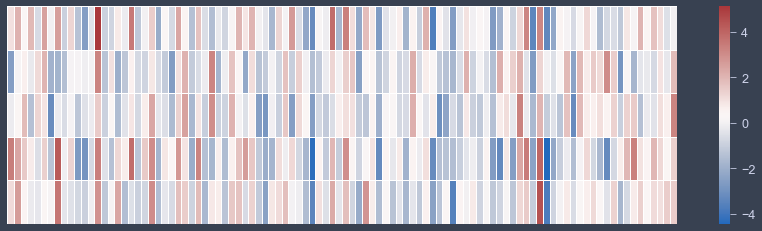

In [71]:
plt.figure(figsize=(15,4))
sns.heatmap([gensim_model.wv["king"], 
             gensim_model.wv["man"], 
             gensim_model.wv["woman"], 
             gensim_model.wv["king"] - gensim_model.wv["man"] + gensim_model.wv["woman"],
             gensim_model.wv["queen"],
            ], cbar=True, xticklabels=False, yticklabels=False,linewidths=1,cmap="vlag") 
plt.show()

In [72]:
x = gensim_model.wv["paris"] + gensim_model.wv["germany"] - gensim_model.wv["berlin"]

In [73]:
x

array([-5.95839620e-01,  4.83884156e-01,  1.79438281e+00,  1.43223405e+00,
        1.12962079e+00,  7.42231727e-01, -2.45055389e+00,  2.71275330e+00,
        2.52985263e+00,  3.39324212e+00, -6.09547615e-01,  4.19723332e-01,
       -6.88719988e-01, -9.58087683e-01,  9.77741718e-01,  1.58371150e-01,
        2.18805432e-01, -1.34157276e+00, -1.06756687e-01, -1.67740417e+00,
        2.61722064e+00,  3.20417881e+00,  2.24567842e+00,  8.34653497e-01,
       -5.83064556e-02,  2.81899977e+00, -2.26603508e-01, -3.61150384e-01,
        1.21304154e-01,  7.04795420e-01, -6.28932357e-01,  3.70419770e-01,
       -9.14212883e-01,  2.32326746e+00, -8.85619104e-01,  1.01870596e+00,
        1.65169168e+00, -2.98628592e+00,  5.48151731e-01, -1.37352204e+00,
        8.87057483e-01,  9.42169845e-01, -1.02907872e+00, -2.01587105e+00,
       -1.29438090e+00, -3.13464493e-01,  2.95051694e+00,  2.89554596e+00,
        9.09931004e-01,  1.53222859e-01,  1.25289309e+00,  1.72404301e+00,
        5.71276307e-01,  

In [74]:
gensim_model.wv["france"]

array([ 0.3716324 ,  2.0865693 ,  1.6778361 , -0.14426947,  1.1930861 ,
        2.155661  , -0.49152768,  3.3454578 ,  0.7220797 ,  2.5041733 ,
        0.62010866, -0.20087433, -1.8150067 ,  0.34477505,  1.2554781 ,
        1.3071592 , -0.00776817, -0.17219262, -1.0021654 , -2.6784484 ,
        1.4356128 ,  3.397555  ,  0.6945748 ,  0.5485612 , -1.123159  ,
        1.8503331 , -0.7007616 ,  0.04393266,  1.4597993 , -0.5673457 ,
       -0.3475152 ,  0.7696329 , -0.35259143,  2.071179  , -0.47037306,
        0.6710733 ,  0.96819574, -1.4421403 ,  0.2369265 ,  0.2261117 ,
        0.4931761 , -0.25110716,  0.04797141, -1.4399406 , -0.38885406,
        1.7724222 ,  2.096675  ,  1.8491864 ,  1.692483  , -0.50916046,
        2.1083694 ,  1.1956376 ,  0.45574528,  1.4536197 ,  2.0768542 ,
       -0.22332563,  0.87108415,  0.99711066,  0.9323479 , -1.8658422 ,
       -0.76421624,  0.22506371,  0.19454223, -1.2773122 ,  0.3590033 ,
       -0.7415218 ,  0.8044129 ,  2.5632713 , -0.31483012, -0.47

#### Jak możemy znaleźć do czego odnosi się wektor x:

In [77]:
from scipy.spatial.distance import cdist

keys = gensim_model.wv.index_to_key

best_index = np.argmin(cdist(x.reshape(1,100), gensim_model.wv.vectors, "cosine"))

In [78]:
keys[best_index]

'france'

In [79]:
gensim_model.wv.most_similar(x)

[('france', 0.7936767935752869),
 ('italy', 0.7704543471336365),
 ('paris', 0.7676132321357727),
 ('germany', 0.7597668170928955),
 ('switzerland', 0.7032967209815979),
 ('belgium', 0.6825010776519775),
 ('spain', 0.656050980091095),
 ('austria', 0.6485854387283325),
 ('munich', 0.6217860579490662),
 ('vienna', 0.615205705165863)]

Najmniej pasujące:

In [80]:
gensim_model.wv.doesnt_match("pizza tomato cheese pineapple".split())

'pineapple'

In [81]:
gensim_model.wv.doesnt_match("car bike boat tree".split())

'tree'

## Zaawansowane modele językowe

In [4]:
import transformers
from transformers import *
import numpy as np
from datasets import load_dataset, load_metric

#### Bert
Zajmujemy się tłumaczeniem jednej sekwencji w drugą sekwencję.
![title](https://i.pinimg.com/originals/d6/6a/3e/d66a3e867580854200fa37f08e8addaa.gif "segment")

In [5]:
model_name = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [6]:
tokenizer

PreTrainedTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_len=512, is_fast=True, padding_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [7]:
model

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0): TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(i

Przetrenowane modele językowe:
+ Huggingface: https://huggingface.co/transformers/pretrained_models.html
+ Community: https://huggingface.co/models



In [8]:
tokenized_sentence = tokenizer("BERT is designed to pre-train deep bidirectional representations")
tokenized_sentence

{'input_ids': [101, 14324, 2003, 2881, 2000, 3653, 1011, 3345, 2784, 7226, 7442, 7542, 2389, 15066, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [9]:
tokenizer.convert_ids_to_tokens(tokenized_sentence["input_ids"])

['[CLS]',
 'bert',
 'is',
 'designed',
 'to',
 'pre',
 '-',
 'train',
 'deep',
 'bid',
 '##ire',
 '##ction',
 '##al',
 'representations',
 '[SEP]']

Jedno słówko, jeśli go nie ma w słowniku, podzielił na kilka podsłówek. Tak więc słownik teraz ma fragmenty. Jest to dobre np w języku polskim.

In [10]:
tokenizer("Śpiulkolot")

{'input_ids': [101, 11867, 17922, 13687, 12898, 2102, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}

In [11]:
tokenizer.convert_ids_to_tokens([101, 11867, 17922, 13687, 12898, 2102, 102])

['[CLS]', 'sp', '##iu', '##lk', '##olo', '##t', '[SEP]']

### Dotrenowywanie gotowego modelu
#### Załadowanie
Przepuszczamy przez tokenizer.

In [12]:
result = model(**tokenizer("BERT is designed to pre-train deep bidirectional representations by jointly conditioning on both left and right context in all layers.", return_tensors="pt"))
result.keys()

odict_keys(['last_hidden_state'])

In [13]:
result.last_hidden_state, result.last_hidden_state.size()

(tensor([[[-0.4867, -0.1770, -0.1706,  ..., -0.0752, -0.0195,  0.6925],
          [ 0.0744, -0.2203,  0.1330,  ..., -0.0730, -0.1128,  0.3024],
          [-0.6035, -0.2432, -0.0209,  ..., -0.2963, -0.6380,  0.6463],
          ...,
          [ 0.2347,  0.1218,  0.1038,  ..., -0.2239, -0.1634,  0.2523],
          [ 0.7587,  0.1439, -0.5647,  ...,  0.4042, -0.7747, -0.2532],
          [ 0.3978,  0.4038, -0.3577,  ...,  0.3608, -0.9130, -0.0176]]],
        grad_fn=<NativeLayerNormBackward>),
 torch.Size([1, 28, 768]))

Aby wziać gotowy model:

In [14]:
sentiment_model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classi

In [15]:
sentiment_model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

#### Dotrenowywanie

Biblioteka datasets - są tam popularne zbiory. Pozwala załadować zbiory.

https://huggingface.co/transformers/main_classes/trainer.html#trainingarguments

In [16]:
raw_datasets = load_dataset("glue","sst2")

Reusing dataset glue (C:\Users\01149762\.cache\huggingface\datasets\glue\sst2\1.0.0\dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


  0%|          | 0/3 [00:00<?, ?it/s]

In [17]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 872
    })
    test: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1821
    })
})

In [18]:
raw_datasets["train"]["sentence"]

['hide new secretions from the parental units ',
 'contains no wit , only labored gags ',
 'that loves its characters and communicates something rather beautiful about human nature ',
 'remains utterly satisfied to remain the same throughout ',
 'on the worst revenge-of-the-nerds clichés the filmmakers could dredge up ',
 "that 's far too tragic to merit such superficial treatment ",
 'demonstrates that the director of such hollywood blockbusters as patriot games can still turn out a small , personal film with an emotional wallop . ',
 'of saucy ',
 "a depressed fifteen-year-old 's suicidal poetry ",
 "are more deeply thought through than in most ` right-thinking ' films ",
 'goes to absurd lengths ',
 "for those moviegoers who complain that ` they do n't make movies like they used to anymore ",
 "the part where nothing 's happening , ",
 'saw how bad this movie was ',
 'lend some dignity to a dumb story ',
 'the greatest musicians ',
 'cold movie ',
 'with his usual intelligence and s

In [19]:
def tokenize_function(examples):
    return tokenizer(examples["sentence"], padding="max_length", truncation=True)

In [21]:
tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)
tokenized_datasets = tokenized_datasets.remove_columns(["sentence","idx"])
tokenized_datasets.set_format("torch")
small_train_dataset = tokenized_datasets["train"]#.shuffle(seed=42).select(range(10000))
small_eval_dataset = tokenized_datasets["validation"]

  0%|          | 0/68 [00:00<?, ?ba/s]

Loading cached processed dataset at C:\Users\01149762\.cache\huggingface\datasets\glue\sst2\1.0.0\dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad\cache-3b973809f4ba4741.arrow
Loading cached processed dataset at C:\Users\01149762\.cache\huggingface\datasets\glue\sst2\1.0.0\dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad\cache-0f17b6bcebe8fc01.arrow


Bardzo mały batch size - bo model jest za duży.

In [24]:
train_dataloader = DataLoader(small_train_dataset, shuffle=True, batch_size=10)
eval_dataloader = DataLoader(small_eval_dataset, batch_size=8)

In [25]:
optimizer = Adam(sentiment_model.parameters(), lr=5e-5)
sentiment_model.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

#### Uczenie

In [26]:
num_epochs = 3
loss_fun = nn.CrossEntropyLoss()

for epoch in range(num_epochs):
    losses = []
    for batch in train_dataloader:

        labels = batch["label"].to(device)
        batch = {"attention_mask": batch['attention_mask'].to(device), "input_ids": batch['input_ids'].to(device)}#, "token_type_ids":batch['token_type_ids'].to(device)}
        outputs = sentiment_model(**batch)
        loss = loss_fun(outputs.logits, labels)
        loss.backward()

        optimizer.step()
        #         lr_scheduler.step()
        optimizer.zero_grad()
        # progress_bar.update(1)
        losses.append(loss.item())
    print(np.mean(losses))

0.21367141640151877
0.11424943384045144
0.07635031398741837


In [27]:
torch.save(sentiment_model.state_dict(),"models/sentiment_model_dict")
# sentiment_model.load_state_dict(torch.load("sentiment_model_dict"))

#### Ewaluacja

In [28]:
metric= load_metric("accuracy")
model.eval()
for batch in eval_dataloader:
    labels = batch["label"].to(device)
    batch = {"attention_mask": batch['attention_mask'].to(device), "input_ids": batch['input_ids'].to(device)}#, "token_type_ids":batch['token_type_ids'].to(device)}

    with torch.no_grad():
        outputs = sentiment_model(**batch)

    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    metric.add_batch(predictions=predictions, references=labels)

metric.compute()

{'accuracy': 0.8807339449541285}

## Odpowiadanie na pytania (Question answering)
Embeddigni można wykorzystać do wielu zastosowań.

In [29]:
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
model_name = "deepset/roberta-base-squad2"
qa_tokenizer = AutoTokenizer.from_pretrained("deepset/roberta-base-squad2")

qa_model = AutoModelForQuestionAnswering.from_pretrained("deepset/roberta-base-squad2")

In [30]:
context = '''Warsaw is the capital and largest city of Poland.
The metropolis stands on the River Vistula in east-central Poland and its population is officially estimated at 1.8 million
residents within a greater metropolitan area of 3.1 million residents, which makes Warsaw the 7th
most-populous capital city in the European Union.
The city area measures 517 km2 (200 sq mi) and comprises 18 boroughs,
while the metropolitan area covers 6,100 km2 (2,355 sq mi).
Warsaw is an alpha- global city, a major cultural, political and economic hub,
and the country's seat of government. Its historical Old Town was designated a UNESCO World Heritage Site.'''

In [31]:
nlp = transformers.pipeline('question-answering', model=model_name, tokenizer=model_name)
QA_input = {
    'question': 'Where does the water in Warsaw come from?',
    'context': context}
res = nlp(QA_input)

In [32]:
res

{'score': 0.7980945110321045,
 'start': 79,
 'end': 92,
 'answer': 'River Vistula'}